In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

C:\Users\thinkpad\anaconda3\envs\r-tutorial\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


# Explore global dataset

In [2]:
df = pd.read_excel('S&P Global rated companies.xlsx')

In [3]:
df.head()

,SP_ENTITY_NAME,SP_ENTITY_ID,RD_CREDIT_RATING_GLOBAL,RD_CREDIT_RATING_GLOBAL.1,SP_TICKER,SP_EXCHANGE,SP_ISIN,SP_GEOGRAPHY,SP_COUNTRY_NAME,SP_COUNTRY_CODE,IQ_INDUSTRY_GROUP
0,"""TEMIRYO'L-SUG'URTA"" LLC",20023199,NaN,B+,NaN,NaN,NaN,Europe,Uzbekistan,UZ,Insurance
1,"""TransteleCom"" JSC",7661998,B,B,NaN,NaN,NaN,Europe,Kazakhstan,KZ,Telecommunication Services
2,1011778 B.C. Unlimited Liability Company,6561202,BB,BB,NaN,NaN,NaN,United States and Canada,Canada,CA,Consumer Services
3,21st Century Casualty Company,16700,NaN,A,NaN,NaN,NaN,United States and Canada,USA,US,Insurance
4,21st Century Centennial Insurance Company,12057,NaN,A,NaN,NaN,NaN,United States and Canada,USA,US,Insurance


In [4]:
df.columns

Index(['SP_ENTITY_NAME', 'SP_ENTITY_ID', 'RD_CREDIT_RATING_GLOBAL',
       'RD_CREDIT_RATING_GLOBAL.1', 'SP_TICKER', 'SP_EXCHANGE', 'SP_ISIN',
       'SP_GEOGRAPHY', 'SP_COUNTRY_NAME', 'SP_COUNTRY_CODE',
       'IQ_INDUSTRY_GROUP'],
      dtype='object')

In [5]:
df.shape

(8957, 11)

# Explore global listed dataset

In [6]:
listed_df = df[df['SP_TICKER'].notnull()]
listed_df.head()

,SP_ENTITY_NAME,SP_ENTITY_ID,RD_CREDIT_RATING_GLOBAL,RD_CREDIT_RATING_GLOBAL.1,SP_TICKER,SP_EXCHANGE,SP_ISIN,SP_GEOGRAPHY,SP_COUNTRY_NAME,SP_COUNTRY_CODE,IQ_INDUSTRY_GROUP
13,3i Group plc (LSE:III),4147418,BBB+,BBB+,III,LSE,GB00B1YW4409,Europe,United Kingdom,GB,Financial Services
14,3M Company (NYSE:MMM),105135,BBB+,BBB+,MMM,NYSE,US88579Y1010,United States and Canada,USA,US,Capital Goods
15,3R Petroleum Óleo e Gás S.A. (BOVESPA:RRRP3),7163456,B+,B+,RRRP3,BOVESPA,BRRRRPACNOR5,Latin America and Caribbean,Brazil,BR,Energy
20,888 Holdings plc (LSE:888),4988507,B,B,888,LSE,GI000A0F6407,Europe,Gibraltar,GI,Consumer Services
24,A.P. Møller - Mærsk A/S (CPSE:MAERSK B),4232116,BBB+,BBB+,MAERSK B,CPSE,DK0010244508,Europe,Denmark,DK,Transportation


In [7]:
listed_df.shape

(2522, 11)

In [8]:
listed_df['SP_EXCHANGE'].unique()

array(['LSE', 'NYSE', 'BOVESPA', 'CPSE', 'BIT', 'OM', 'NSEL', 'SWX',
       'ENXTAM', 'ADX', 'NASDAQGS', 'ENXTPA', 'BME', 'NSEI', 'NASDAQCM',
       'OB', 'XTRA', 'SET', 'ENXTBR', 'TSE', 'SNSE', 'SEHK', 'ISE', 'TSX',
       'HLSE', 'DSM', 'SASE', 'KWSE', 'BMV', 'WSE', 'ATSE', 'ASX', 'IBSE',
       'NASDAQGM', 'BAX', 'BVMT', 'ICSE', 'CBSE', 'NZSE', 'KLSE', 'BSE',
       'BVL', 'ENXTLS', 'BVC', 'BASE', 'TASE', 'MSM', 'CSE', 'PSE',
       'MTSE', 'SHSE', 'SZSE', 'DSE', 'AIM', 'OTCPK', 'SGX', 'TWSE',
       'BATS', 'PSGM', 'SEP', 'CASE', 'KOSE', 'BVB', 'OTCQB', 'NGSE',
       'DFM', 'OTCEM', 'WBAG', 'TTSE', 'JSE', 'KAS', 'DB', 'NYSEAM',
       'HMSE', 'HOSE', 'ASE', 'BUSE', 'LJSE', 'IDX', 'OTCQX', 'TPEX'],
      dtype=object)

# Explore global listed US&Canada dataset

In [9]:
listed_df['SP_GEOGRAPHY'].unique()

array(['Europe', 'United States and Canada',
       'Latin America and Caribbean', 'Middle East', 'Asia-Pacific',
       'Africa'], dtype=object)

In [10]:
listed_US_df = listed_df[listed_df['SP_GEOGRAPHY']=='United States and Canada'].reset_index(drop = True)
listed_US_df.head()

,SP_ENTITY_NAME,SP_ENTITY_ID,RD_CREDIT_RATING_GLOBAL,RD_CREDIT_RATING_GLOBAL.1,SP_TICKER,SP_EXCHANGE,SP_ISIN,SP_GEOGRAPHY,SP_COUNTRY_NAME,SP_COUNTRY_CODE,IQ_INDUSTRY_GROUP
0,3M Company (NYSE:MMM),105135,BBB+,BBB+,MMM,NYSE,US88579Y1010,United States and Canada,USA,US,Capital Goods
1,AAR Corp. (NYSE:AIR),4157610,BB+,BB+,AIR,NYSE,US0003611052,United States and Canada,USA,US,Capital Goods
2,Abbott Laboratories (NYSE:ABT),4004092,AA-,AA-,ABT,NYSE,US0028241000,United States and Canada,USA,US,Health Care Equipment and Services
3,AbbVie Inc. (NYSE:ABBV),4558282,A-,A-,ABBV,NYSE,US00287Y1091,United States and Canada,USA,US,"Pharmaceuticals, Biotechnology and Life Sciences"
4,Abercrombie & Fitch Co. (NYSE:ANF),4066681,BB-,BB-,ANF,NYSE,US0028962076,United States and Canada,USA,US,Consumer Discretionary Distribution and Retail


In [11]:
listed_US_df.shape

(1300, 11)

In [12]:
sum(listed_US_df['SP_COUNTRY_NAME'] == 'Canada')

117

## Get US tickers

In [13]:
US_tickers_list = list(listed_US_df['SP_TICKER'])
US_tickers_list[:10]

['MMM', 'AIR', 'ABT', 'ABBV', 'ANF', 'ASO', 'ACHC', 'ACCO', 'ACIW', 'AYI']

# Explore global listed Latin America&Carribean dataset

In [14]:
listed_Latin_df = listed_df[listed_df['SP_GEOGRAPHY']=='Latin America and Caribbean'].reset_index(drop = True)
listed_Latin_df.head()

,SP_ENTITY_NAME,SP_ENTITY_ID,RD_CREDIT_RATING_GLOBAL,RD_CREDIT_RATING_GLOBAL.1,SP_TICKER,SP_EXCHANGE,SP_ISIN,SP_GEOGRAPHY,SP_COUNTRY_NAME,SP_COUNTRY_CODE,IQ_INDUSTRY_GROUP
0,3R Petroleum Óleo e Gás S.A. (BOVESPA:RRRP3),7163456,B+,B+,RRRP3,BOVESPA,BRRRRPACNOR5,Latin America and Caribbean,Brazil,BR,Energy
1,AES Andes S.A. (SNSE:AESANDES),4149664,BBB-,BBB-,AESANDES,SNSE,CL0002694637,Latin America and Caribbean,Chile,CL,Utilities
2,Aguas Andinas S.A. (SNSE:AGUAS.A),5000828,A-,A-,AGUAS.A,SNSE,CL0000000035,Latin America and Caribbean,Chile,CL,Utilities
3,Alfa S.A.B. de C.V. (BMV:ALFA A),4284215,BBB-,BBB-,ALFA A,BMV,MXP000511016,Latin America and Caribbean,Mexico,MX,Capital Goods
4,"ALPEK, S.A.B. de C.V. (BMV:ALPEK A)",4986459,BBB-,BBB-,ALPEK A,BMV,MX01AL0C0004,Latin America and Caribbean,Mexico,MX,Materials


In [15]:
listed_Latin_df.shape

(142, 11)

## Get Latin American tickers

In [16]:
Latin_tickers_list = list(listed_Latin_df['SP_TICKER'])
Latin_tickers_list[:10]

['RRRP3',
 'AESANDES',
 'AGUAS.A',
 'ALFA A',
 'ALPEK A',
 'ABEV3',
 'AMBP3',
 'AMX B',
 'AMER3',
 'AXTEL CPO']

# Try to deal with the problematic tickers

## Drop BVL stocks for now
The Lima Stock Exchange in Peru, data not available on yahoo finance. 8 tickers can't be used.

In [17]:
listed_Latin_df.reset_index(drop=True, inplace = True)

In [18]:
listed_Latin_df[listed_Latin_df['SP_EXCHANGE']=='BVL'].index

Int64Index([12, 18, 24, 91, 103, 106, 126, 136], dtype='int64')

In [19]:
listed_Latin_df.drop(index = [12, 18, 24, 91, 103, 106, 126, 136], inplace = True)

## Adjust ticker based on the stock exchange it is traded in

In [20]:
# Traded in BMV
listed_Latin_df['SP_TICKER'] = np.where(listed_Latin_df['SP_EXCHANGE']=='BMV', listed_Latin_df['SP_TICKER'].str.replace(' ', ''), listed_Latin_df['SP_TICKER'])
listed_Latin_df['SP_TICKER'] = np.where(listed_Latin_df['SP_EXCHANGE']=='BMV', listed_Latin_df['SP_TICKER'].str.replace('*', ''), listed_Latin_df['SP_TICKER'])
listed_Latin_df['SP_TICKER'] = np.where(listed_Latin_df['SP_EXCHANGE']=='BMV', listed_Latin_df['SP_TICKER'].str.replace('.', '-'), listed_Latin_df['SP_TICKER'])
listed_Latin_df['SP_TICKER'] = np.where(listed_Latin_df['SP_EXCHANGE']=='BMV', listed_Latin_df['SP_TICKER']+'.MX', listed_Latin_df['SP_TICKER'])

# Traded in BOVESPA
listed_Latin_df['SP_TICKER'] = np.where(listed_Latin_df['SP_EXCHANGE']=='BOVESPA', listed_Latin_df['SP_TICKER']+'.SA', listed_Latin_df['SP_TICKER'])

# Traded in BVC
listed_Latin_df['SP_TICKER'] = np.where(listed_Latin_df['SP_EXCHANGE']=='BVC', listed_Latin_df['SP_TICKER']+'.CL', listed_Latin_df['SP_TICKER'])

# Traded in BASE
listed_Latin_df['SP_TICKER'] = np.where(listed_Latin_df['SP_EXCHANGE']=='BASE', listed_Latin_df['SP_TICKER']+'.BA', listed_Latin_df['SP_TICKER'])

# Traded in SNSE
listed_Latin_df['SP_TICKER'] = np.where(listed_Latin_df['SP_EXCHANGE']=='SNSE', listed_Latin_df['SP_TICKER'].str.replace('.', '-'), listed_Latin_df['SP_TICKER'])
listed_Latin_df['SP_TICKER'] = np.where(listed_Latin_df['SP_EXCHANGE']=='SNSE', listed_Latin_df['SP_TICKER']+'.SN', listed_Latin_df['SP_TICKER'])

# Traded in TSX
listed_Latin_df['SP_TICKER'] = np.where(listed_Latin_df['SP_EXCHANGE']=='TSX', listed_Latin_df['SP_TICKER'].str.replace('.', '-'), listed_Latin_df['SP_TICKER'])
listed_Latin_df['SP_TICKER'] = np.where(listed_Latin_df['SP_EXCHANGE']=='TSX', listed_Latin_df['SP_TICKER']+'.TO', listed_Latin_df['SP_TICKER'])

# Traded in PSGM
listed_Latin_df['SP_TICKER'] = np.where(listed_Latin_df['SP_EXCHANGE']=='PSGM', listed_Latin_df['SP_TICKER'].str.replace('.', ''), listed_Latin_df['SP_TICKER'])

C:\Users\thinkpad\AppData\Local\Temp\ipykernel_22884\2376721267.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listed_Latin_df['SP_TICKER'] = np.where(listed_Latin_df['SP_EXCHANGE']=='BMV', listed_Latin_df['SP_TICKER'].str.replace('*', ''), listed_Latin_df['SP_TICKER'])
C:\Users\thinkpad\AppData\Local\Temp\ipykernel_22884\2376721267.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listed_Latin_df['SP_TICKER'] = np.where(listed_Latin_df['SP_EXCHANGE']=='BMV', listed_Latin_df['SP_TICKER'].str.replace('.', '-'), listed_Latin_df['SP_TICKER'])
C:\Users\thinkpad\AppData\Local\Temp\ipykernel_22884\2376721267.py:17: FutureWarning: The default value of regex will change from T

## special problem: wrongly recorded ticker `CAPXD.BA` to `CAPX.BA`

In [21]:
listed_Latin_df['SP_TICKER'] = np.where(listed_Latin_df['SP_TICKER']=='CAPXD.BA', 'CAPX.BA', listed_Latin_df['SP_TICKER'])

In [22]:
useable_Latin_tickerlist = ' '.join(list(listed_Latin_df['SP_TICKER']))

# Download stock price data

In [23]:
Latin_price = yf.download(useable_Latin_tickerlist)

[*********************100%%**********************]  134 of 134 completed

2 Failed downloads:
['FCGFH', 'COLTEL.CL']: Exception('%ticker%: No timezone found, symbol may be delisted')


## The rest of the problematic tickers

**'COLTEL.CL'**: Colombia Telecomunicaciones S. A. E.S.P. BIC (BVC:COLTEL), from BVC, not available. Delisted?  
**'FCGFH'**: First Citizens Group Financial Holdings Limited (TTSE:FCGFH), from Trinidad and Tobago's stock exchange

# Export the Latin American price data

In [24]:
Latin_price.to_csv('Latin American stock prices.csv')

# Check price data availability

In [25]:
Latin_price['Open'].shape[1]

134

In [26]:
num_datapoint = np.sum(Latin_price['Open'].notnull(), axis = 1)

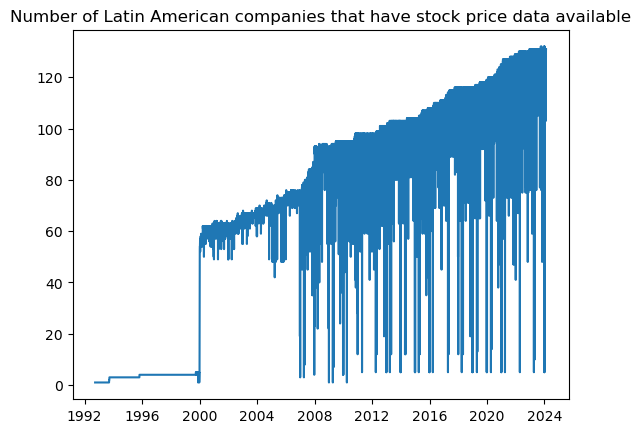

In [27]:
plt.plot(num_datapoint);
plt.title('Number of Latin American companies that have stock price data available');

# Get Latin American liability data

In [28]:
isin = ', '.join(list(listed_Latin_df['SP_ISIN']))

In [29]:
isin

'BRRRRPACNOR5, CL0002694637, CL0000000035, MXP000511016, MX01AL0C0004, BRABEVACNOR1, BRAMBPACNOR6, MX01AM050019, BRAMERACNOR6, MX01AX040009, BRAZULACNPR4, BRABCBACNPR4, BRBBDCACNPR8, BRBPACUNT006, COB51PA00076, COB01PA00030, CLP0939W1081, CLP321331116, BRBBASACNOR3, BRBRSRACNPB4, BRBNBRACNOR8, CL0002209568, CL0002841873, PAP169941328, BRBPANACNPR1, ARMERI013163, BRSANBACNPR5, CLP1506A1070, COB07PA00078, MX01CU010003, BRBRKMACNPA4, BRBSLIACNPR2, BRBRFSACNOR8, BRCAMLACNOR3, CLP256251073, ARP2006N1025, KYG1899E1465, MXP225611567, BRELETACNPB7, US1912411089, CLP3615W1037, COI06PA00026, BRCEEBACNOR3, BRSBSPACNOR5, BRCMIGACNPR3, BRCSRNACNOR0, BRCSNAACNOR6, CLP249051044, MX01VE0M0003, BRCSANACNOR6, BMG2519Y1084, MXP339881098, COC04PA00016, MXP369181377, CLP3697S1034, BREMBRACNOR4, ARENOR010020, CLP371151059, CL0000001314, CLP7847L1080, CLP371861061, CL0002266774, CLP3710M1090, BRENGIACNOR0, CL0001583070, CL0000006586, CLP3880F1085, MXCFFI170008, MXCFTE0B0005, TTE000000140, MXP320321310, CLP41

## Use the liability data retrieved from Orbis

In [100]:
Latin_liability_df = pd.read_excel('Latin American listed companies total liabilities.xlsx')
Latin_liability_df.head()

,Company name Latin alphabet,ISIN number,Last avail. year,Total liabilities\nth USD 2023,Total liabilities\nth USD 2022,Total liabilities\nth USD 2021,Total liabilities\nth USD 2020,Total liabilities\nth USD 2019,Total liabilities\nth USD 2018,Total liabilities\nth USD 2017,...,Total liabilities\nth USD 2003,Total liabilities\nth USD 2002,Total liabilities\nth USD 2001,Total liabilities\nth USD 2000,Total liabilities\nth USD 1999,Total liabilities\nth USD 1998,Total liabilities\nth USD 1997,Total liabilities\nth USD 1996,Total liabilities\nth USD 1995,Total liabilities\nth USD 1994
0,PETROLEO BRASILEIRO S.A.,BRPETRACNOR9,2022,n.a.,117368648.841977,104548471.462429,130149340.78981,155547997.792661,148915899.463892,169893576.668501,...,30078613.820327,17816044.843642,19906952.638806,21500509.564335,21849368.392716,15198528.964807,15360570.273095,14518343.525402,11471424.948018,n.a.
1,JBS S.A.,BRJBSSACNOR8,2022,n.a.,30342851.637829,28551121.049792,23143822.321448,23289083.618158,22249656.359658,24960780.453938,...,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.
2,RAIZEN S.A.,BRRAIZACNPR6,2023,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.
3,AMERICA MOVIL S.A.B. DE C.V.,MXP001691213,2022,n.a.,60793850.001636,60029058.028843,65664960.200784,69249824.831427,60120761.688474,61939501.140512,...,7188205.404752,6192160.191804,3941466.909908,2445108.508605,969687.434542,178257.57303,n.a.,n.a.,n.a.,n.a.
4,VALE S.A.,BRVALEACNOR0,2022,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.


In [101]:
year_list = []
for i in range(-2023, -1993, 1):
    year_list.append(str(-i))

In [102]:
Latin_liability_df.columns = ['Company name Latin alphabet', 'ISIN number', 'Last avail. year'] + year_list

In [103]:
Latin_liability_df.head()

,Company name Latin alphabet,ISIN number,Last avail. year,2023,2022,2021,2020,2019,2018,2017,...,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994
0,PETROLEO BRASILEIRO S.A.,BRPETRACNOR9,2022,n.a.,117368648.841977,104548471.462429,130149340.78981,155547997.792661,148915899.463892,169893576.668501,...,30078613.820327,17816044.843642,19906952.638806,21500509.564335,21849368.392716,15198528.964807,15360570.273095,14518343.525402,11471424.948018,n.a.
1,JBS S.A.,BRJBSSACNOR8,2022,n.a.,30342851.637829,28551121.049792,23143822.321448,23289083.618158,22249656.359658,24960780.453938,...,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.
2,RAIZEN S.A.,BRRAIZACNPR6,2023,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.
3,AMERICA MOVIL S.A.B. DE C.V.,MXP001691213,2022,n.a.,60793850.001636,60029058.028843,65664960.200784,69249824.831427,60120761.688474,61939501.140512,...,7188205.404752,6192160.191804,3941466.909908,2445108.508605,969687.434542,178257.57303,n.a.,n.a.,n.a.,n.a.
4,VALE S.A.,BRVALEACNOR0,2022,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,...,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.,n.a.


## Convert `n.a.` to null values

In [106]:
for i in range(Latin_liability_df.shape[0]):
    for j in range(Latin_liability_df.shape[1]):
        if Latin_liability_df.iloc[i,j] == 'n.a.':
            Latin_liability_df.iloc[i,j]= np.nan

In [107]:
Latin_liability_df.head()

,Company name Latin alphabet,ISIN number,Last avail. year,2023,2022,2021,2020,2019,2018,2017,...,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994
0,PETROLEO BRASILEIRO S.A.,BRPETRACNOR9,2022,NaN,117368648.841977,104548471.462429,130149340.78981,155547997.792661,148915899.463892,169893576.668501,...,30078613.820327,17816044.843642,19906952.638806,21500509.564335,21849368.392716,15198528.964807,15360570.273095,14518343.525402,11471424.948018,NaN
1,JBS S.A.,BRJBSSACNOR8,2022,NaN,30342851.637829,28551121.049792,23143822.321448,23289083.618158,22249656.359658,24960780.453938,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RAIZEN S.A.,BRRAIZACNPR6,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AMERICA MOVIL S.A.B. DE C.V.,MXP001691213,2022,NaN,60793850.001636,60029058.028843,65664960.200784,69249824.831427,60120761.688474,61939501.140512,...,7188205.404752,6192160.191804,3941466.909908,2445108.508605,969687.434542,178257.57303,NaN,NaN,NaN,NaN
4,VALE S.A.,BRVALEACNOR0,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Check liability data availability

## Number of companies that have liability data available

In [113]:
num_com_datapoint = np.sum(Latin_liability_df[year_list].notnull(), axis = 1)

In [122]:
sum(num_com_datapoint != 0)

91

## Data availability in terms of years

In [118]:
num_year_datapoint = np.sum(Latin_liability_df[year_list].notnull(), axis = 0)

In [130]:
num_year_datapoint.sort_index(inplace = True)

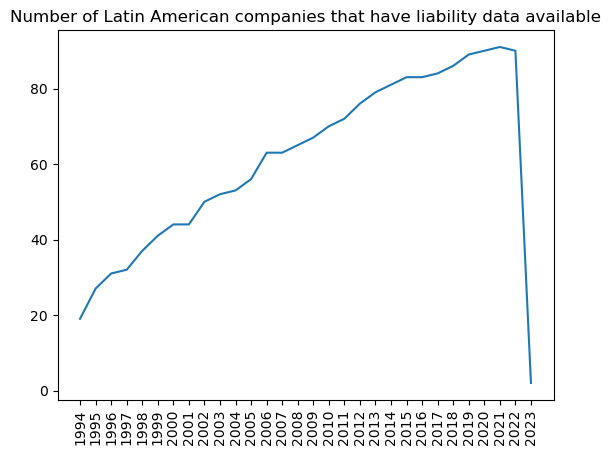

In [133]:
plt.plot(num_year_datapoint);
plt.title('Number of Latin American companies that have liability data available');
plt.xticks(year_list, rotation = 90);

In [1]:
import pandas as pd

In [2]:
temp = pd.read_csv('Latin American stock prices.csv')

C:\Users\thinkpad\AppData\Local\Temp\ipykernel_17048\175978472.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,

In [3]:
temp

,Price,Adj Close,Adj Close.1,Adj Close.2,Adj Close.3,Adj Close.4,Adj Close.5,Adj Close.6,Adj Close.7,Adj Close.8,...,Volume.124,Volume.125,Volume.126,Volume.127,Volume.128,Volume.129,Volume.130,Volume.131,Volume.132,Volume.133
0,Ticker,ABCB4.SA,ABEV3.SA,AESANDES.SN,AGUAS-A.SN,ALFAA.MX,ALPEKA.MX,AMBP3.SA,AMER3.SA,AMXB.MX,...,TLEVISACPO.MX,TMXLF,TUPY3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VAMO3.SA,VESTA.MX,VINTE.MX,YPFD.BA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8126,2024-02-05,24.190001,13.09,81.059998,276.299988,NaN,NaN,13.67,0.72,NaN,...,NaN,NaN,436400.0,4013500.0,8194000.0,24103300.0,9821100.0,NaN,NaN,270705.0
8127,2024-02-06,24.190001,13.23,81.059998,277.0,13.71,11.55,14.03,0.73,15.36,...,2899988.0,NaN,540100.0,7622400.0,10333900.0,27505600.0,7301900.0,3349372.0,112.0,212523.0
8128,2024-02-07,23.950001,13.0,81.059998,281.899994,13.73,11.44,14.38,0.71,15.2,...,4125198.0,NaN,478900.0,6459000.0,9450700.0,19863400.0,5309500.0,3574912.0,109.0,311296.0
8129,2024-02-08,23.629999,12.95,81.059998,282.0,13.81,11.17,13.88,0.68,14.87,...,2451566.0,NaN,374200.0,5468900.0,16579800.0,25812100.0,8552600.0,2487059.0,108.0,187498.0


In [4]:
import yfinance as yf

C:\Users\thinkpad\anaconda3\envs\r-tutorial\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [8]:
temp = yf.download('AAPL')

[*********************100%%**********************]  2 of 2 completed

1 Failed download:
['FB']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [6]:
temp.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087117,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600
